In [1]:
from __future__ import division, print_function, absolute_import

from skimage import color, io
import numpy as np
import os
from glob import glob
import cv2
from skimage import transform, io
import random
from six.moves import cPickle
import pickle
IMG_SIZE = 256

n_files = 4839

In [2]:
np.set_printoptions(suppress=True)

In [5]:
Normalfolders = [
    'a', 'a (2)', 'a (3)','a (4)','a (5)','a (6)','a (7)','a (8)','a (9)','a (10)','a (11)','a (12)','a (13)','a (14)',
    'a (15)','a (16)','a (17)','a (19)','a (20)','a (21)','a (22)','a (23)','a (24)','a (25)','DataAugmentation'
]
TumorFolders = [
 'a (3)','a (4)','a (5)','a (6)','a (7)','a (8)','a (9)','a (10)','a (11)','a (12)','a (13)','a (14)',
    'a (15)','a (16)','a (17)','a (18)','a (19)','a (20)','a (21)','a (22)','a (23)','a (24)','a (25)',
    'a (26)','a (27)','a (28)','a (29)','a (30)','a (31)','a (32)','a (33)','a (35)','a (36)','a (37)',
    'a (38)','a (39)','a (40)','a (41)','a (42)','a (43)','a (44)','a (45)','a (46)','a (47)','a (48)',
    'a (49)','a (50)','a (51)','a (52)','a (53)','a (55)','a (56)','a (57)'
]
Normal = "C:/Users/Kitchen/OneDrive/Desktop/New folder/Normal class/"
Tumor = "C:/Users/Kitchen/OneDrive/Desktop/New folder/Tumor Class/"
DataAugmentation = "C:/Users/Kitchen/OneDrive/Desktop/New folder/Normal class/DataAugmentation/"
n_files = 4839
allX = np.zeros((n_files, IMG_SIZE, IMG_SIZE, 3), dtype='uint8')
ally = np.zeros((n_files), dtype='int32')
training_data = []

def load_images_from_folder(folder,label):
    for filename in os.listdir(folder):
        #img = cv2.imread(os.path.join(folder, filename),cv2.IMREAD_GRAYSCALE)
        img = cv2.imread(os.path.join(folder, filename))
        new_array = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        training_data.append([new_array, label])

for folder in Normalfolders:
    path = os.path.join(Normal+folder)
#     print(path)
    load_images_from_folder(path,0)


for i in range (700):
    # rotating `a` counter clockwise by 90 degrees
    rot_by_90=transform.rotate(allX[i], 90)
    allX[count] = rot_by_90
    ally[y_count] = 0
    # define a name for our new file
    new_file_path = '%s/augmented_imageX90_%s.jpg' % (DataAugmentation, i)
    # write image to the disk
    io.imsave(new_file_path, rot_by_90)
    count += 1
    y_count += 1
    # rotating `a` counter clockwise by 180 degrees
    rot_by_180=transform.rotate(allX[i], 180)
    allX[count] = rot_by_90
    ally[y_count] = 0
    new_file_path = '%s/augmented_imageX180_%s.jpg' % (DataAugmentation, i)
    # write image to the disk
    io.imsave(new_file_path, rot_by_180)
    count += 1
    y_count += 1

In [6]:
print("Total Images before appending Tumor class: ",len(training_data))

for folder in TumorFolders:
    path = os.path.join(Tumor+folder)
#     print(path)
    load_images_from_folder(path,1)
print("Total Images after appending Tumor class: ",len(training_data))

Total Images before appending Tumor class:  2401
Total Images after appending Tumor class:  4839


In [7]:
print(training_data[1000][0].shape)
#shuffle the images to change data order
random.shuffle(training_data)


(256, 256, 3)


In [ ]:
# if(os.path.exists("X[ImagesX128-color].pickle")):
#     pickle_in = open("X[ImagesX128-color].pickle", "rb")
#     X = pickle.load(pickle_in)
#     pickle_in.close()

#     pickle_in = open("Y[Lables].pickle", "rb")
#     Y = pickle.load(pickle_in)
#     pickle_in.close()
#     Y = np.array(Y)
# else:
pickle_out = open("X[ImagesX128-color].pickle", "wb")
pickle.dump(allX, pickle_out,protocol=4)
pickle_out.close()

pickle_out = open("Y[Lables].pickle", "wb")
pickle.dump(ally, pickle_out,protocol=4)
pickle_out.close()


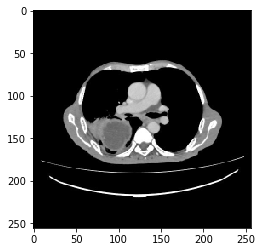

1


In [16]:
import matplotlib.pyplot as plt
plt.imshow(allX[211])
plt.show()
print(ally[211])


In [11]:
count = 0
for features, label in training_data:
    allX[count] = features
    ally[count] = label
    count +=1


In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint
import tensorflow as tf
import datetime
import pickle
import os
print(allX.shape)

(4839, 256, 256, 3)


In [18]:

# model = Sequential()

# model.add(Conv2D(64, (3,3),activation='relu', input_shape = allX.shape[1:]))
# model.add(Conv2D(16, (5,5),activation='relu'))
# model.add(MaxPooling2D(2,2))
# model.add(Conv2D(32, (3,3),activation='relu'))
# model.add(MaxPooling2D(2,2))
# model.add(Conv2D(64, (3,3),activation='relu'))
# model.add(Conv2D(128, (2,2),activation='relu'))



# model.add(Flatten())
# model.add(Dense(512, activation='relu'))
# model.add(Dropout(0.5))

# model.add(Dense(1, activation='sigmoid'))
# model.summary()
model = Sequential()
model.add(Conv2D(64, (3,3),activation='relu', input_shape = allX.shape[1:]))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(32, (3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64, (3,3),activation='relu'))
model.add(MaxPooling2D(2,2))


model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 254, 254, 64)      1792      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 127, 127, 64)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 125, 125, 32)      18464     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 60, 60, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 57600)            

In [14]:
NAME="Tumor-vs-normal-64X2-512{}".format(datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorflow_callback = TensorBoard(log_dir='logs\\{}'.format(NAME), histogram_freq=1)
checkpoint_path = "Tumor64X2-512/normalvstumor.ckpt"

# Create checkpoint callback
cp_callback = ModelCheckpoint(checkpoint_path,save_weights_only=True, monitor = "val_loss", verbose = 0)


In [15]:
opt = tf.keras.optimizers.Adam(lr=0.001)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
model.fit(allX, ally, batch_size = 32, validation_split = 0.2, epochs=10, callbacks = [tensorflow_callback,cp_callback])

W0209 21:08:23.234310 14152 deprecation.py:323] From C:\ProgramData\Anaconda3\envs\tensor\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 3871 samples, validate on 968 samples
Epoch 1/10
3871/3871 [==============================] - 317s 82ms/sample - loss: 6.3491 - accuracy: 0.5856 - val_loss: 4.0832 - val_accuracy: 0.7345
Epoch 2/10
3871/3871 [==============================] - 307s 79ms/sample - loss: 4.1170 - accuracy: 0.7324 - val_loss: 4.1313 - val_accuracy: 0.7314
Epoch 3/10
3871/3871 [==============================] - 305s 79ms/sample - loss: 4.1210 - accuracy: 0.7321 - val_loss: 4.1313 - val_accuracy: 0.7314
Epoch 4/10
3871/3871 [==============================] - 304s 79ms/sample - loss: 4.1210 - accuracy: 0.7321 - val_loss: 4.1313 - val_accuracy: 0.7314
Epoch 5/10
3871/3871 [==============================] - 355s 92ms/sample - loss: 4.1210 - accuracy: 0.7321 - val_loss: 4.1313 - val_accuracy: 0.7314
Epoch 6/10
3871/3871 [==============================] - 371s 96ms/sample - loss: 4.1210 - accuracy: 0.7321 - val_loss: 4.1313 - val_accuracy: 0.7314
Epoch 7/10
3871/3871 [==============================] - 385

In [19]:
model.save("Tumor64X2-512/normalvstumor.model")

NotFoundError: Failed to create a directory: Tumor64X2-512/normalvstumor.model\variables; No such file or directory